In [60]:
#import libraries
import math
import statistics as st
import numpy as np
import scipy.stats
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Part one:
- Read the data set, clean the data and prepare final dataset to be used for analysis.

In [61]:
#getting the data
df=pd.read_csv("DS - Part2 - Basketball.csv")
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


##### checking the data and make descriptive statistics.

In [62]:
df.shape

(61, 13)

In [63]:
df.describe()
#here there are a lot of other columns should be numeric data type.

,Tournament,HighestPositionHeld
count,61.000000,61.000000
mean,24.000000,7.081967
std,26.827225,5.276663
min,1.000000,1.000000
25%,4.000000,3.000000
50%,12.000000,6.000000
75%,38.000000,10.000000
max,86.000000,20.000000


In [64]:
df.dtypes
# only [team - tournament - highestpositionheid] are have right datatype.

Team                   object
Tournament              int64
Score                  object
PlayedGames            object
WonGames               object
DrawnGames             object
LostGames              object
BasketScored           object
BasketGiven            object
TournamentChampion     object
Runner-up              object
TeamLaunch             object
HighestPositionHeld     int64
dtype: object

In [65]:
df.head(10)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934-35,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,-,-,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,-,1,1939-40,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,-,1932-33,1


### cleaning :
- change columns'types to int 
- replace TournamentChampion: from - to 0, and runner-up columns
- TeamLaunch column remove from - and rely on the first part as it is the start year 

In [66]:
#replacing (-) to (0) in TournamentChampion and runner-up columns.
df["TournamentChampion"]=df["TournamentChampion"].replace("-","0")

In [67]:
df["Runner-up"].unique()

array(['23', '25', '8', '6', '7', '4', '-', '3', '1', '5'], dtype=object)

In [68]:
df["Runner-up"]=df["Runner-up"].replace("-","0")

In [69]:
df.columns

Index(['Team', 'Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld'],
      dtype='object')

In [70]:
change_list=['Score', 'PlayedGames', 'WonGames', 'DrawnGames','LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up']
for i in change_list:
    print(i+":"+str(df[i].str.contains("-").any()))

Score:True
PlayedGames:True
WonGames:True
DrawnGames:True
LostGames:True
BasketScored:True
BasketGiven:True
TournamentChampion:False
Runner-up:False


In [71]:
change_list=['Score', 'PlayedGames', 'WonGames', 'DrawnGames','LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up']
for i in change_list:
    print(df[i].unique())

['4385' '4262' '3442' '3386' '3368' '2819' '2792' '2573' '2109' '1884'
 '1814' '1789' '1471' '1416' '1389' '1351' '1314' '1174' '1148' '1020'
 '970' '667' '662' '606' '553' '538' '510' '445' '421' '416' '375' '353'
 '343' '293' '285' '277' '242' '230' '190' '188' '168' '150' '148' '132'
 '107' '96' '91' '83' '81' '76' '71' '56' '52' '42' '40' '35' '34' '22'
 '19' '14' '-']
['2762' '2614' '2664' '2408' '2626' '2302' '1986' '1728' '1530' '1698'
 '1466' '1428' '1458' '1318' '1255' '1192' '988' '1096' '646' '742' '652'
 '678' '456' '628' '494' '586' '380' '402' '423' '426' '448' '346' '334'
 '270' '228' '282' '160' '186' '204' '180' '152' '114' '130' '116' '80'
 '108' '90' '72' '68' '54' '38' '30' '-']
['1647' '1581' '1241' '1187' '1209' '990' '948' '864' '698' '606' '563'
 '586' '463' '453' '471' '426' '390' '408' '333' '367' '266' '218' '189'
 '203' '147' '184' '155' '145' '125' '113' '123' '129' '104' '96' '103'
 '76' '62' '82' '52' '50' '59' '53' '37' '35' '43' '26' '34' '20' '19'
 '30

In [72]:
change_list=['Score', 'PlayedGames', 'WonGames', 'DrawnGames','LostGames', 'BasketScored', 'BasketGiven']
for i in change_list:
    df[i]=df[i][:-1]

In [73]:
change_list=['Score', 'PlayedGames', 'WonGames', 'DrawnGames','LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up']
for i in change_list:
    print(df[i].unique())

['4385' '4262' '3442' '3386' '3368' '2819' '2792' '2573' '2109' '1884'
 '1814' '1789' '1471' '1416' '1389' '1351' '1314' '1174' '1148' '1020'
 '970' '667' '662' '606' '553' '538' '510' '445' '421' '416' '375' '353'
 '343' '293' '285' '277' '242' '230' '190' '188' '168' '150' '148' '132'
 '107' '96' '91' '83' '81' '76' '71' '56' '52' '42' '40' '35' '34' '22'
 '19' '14' nan]
['2762' '2614' '2664' '2408' '2626' '2302' '1986' '1728' '1530' '1698'
 '1466' '1428' '1458' '1318' '1255' '1192' '988' '1096' '646' '742' '652'
 '678' '456' '628' '494' '586' '380' '402' '423' '426' '448' '346' '334'
 '270' '228' '282' '160' '186' '204' '180' '152' '114' '130' '116' '80'
 '108' '90' '72' '68' '54' '38' '30' nan]
['1647' '1581' '1241' '1187' '1209' '990' '948' '864' '698' '606' '563'
 '586' '463' '453' '471' '426' '390' '408' '333' '367' '266' '218' '189'
 '203' '147' '184' '155' '145' '125' '113' '123' '129' '104' '96' '103'
 '76' '62' '82' '52' '50' '59' '53' '37' '35' '43' '26' '34' '20' '19'
 '30

In [74]:
# change columns type to int
change_list=['Score', 'PlayedGames', 'WonGames', 'DrawnGames','LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up']
for i in change_list:
    df[i]=df[i].fillna(0).astype(int)
    


In [75]:
df.dtypes

Team                   object
Tournament              int64
Score                   int32
PlayedGames             int32
WonGames                int32
DrawnGames              int32
LostGames               int32
BasketScored            int32
BasketGiven             int32
TournamentChampion      int32
Runner-up               int32
TeamLaunch             object
HighestPositionHeld     int64
dtype: object

In [76]:
df["TeamLaunch"].unique()

array(['1929', '1931to32', '1934-35', '1939-40', '1932-33', '1941to42',
       '1948-49', '1944_45', '1935-36', '1949_50', '1933to34', '1960-61',
       '1951-52', '1998-99', '1941-42', '1977-78', '1959-60', '2004to05',
       '1961-62', '1940-41', '1930-31', '1963-64', '1974-75', '1943-44',
       '1987-88', '1991_92', '2007-08', '1962-63', '1994-95', '1978-79',
       '1971-72', '1999to00', '2014-15', '1990-91', '1947-48', '1996-97',
       '1995-96', '1945-46', '1953-54', '1979-80', '1950-51', '2016_17',
       '2009-10', '1956-57', '1951~52', '1955-56', '2017~18'],
      dtype=object)

In [77]:
df["TeamLaunch"].replace("t","-")

0         1929
1         1929
2         1929
3     1931to32
4         1929
        ...   
56     2009-10
57     1956-57
58     1951~52
59     1955-56
60     2017~18
Name: TeamLaunch, Length: 61, dtype: object

In [78]:
df["TeamLaunch"]=df["TeamLaunch"].str[:4]

In [79]:
df["TeamLaunch"].unique()

array(['1929', '1931', '1934', '1939', '1932', '1941', '1948', '1944',
       '1935', '1949', '1933', '1960', '1951', '1998', '1977', '1959',
       '2004', '1961', '1940', '1930', '1963', '1974', '1943', '1987',
       '1991', '2007', '1962', '1994', '1978', '1971', '1999', '2014',
       '1990', '1947', '1996', '1995', '1945', '1953', '1979', '1950',
       '2016', '2009', '1956', '1955', '2017'], dtype=object)

#### Save cleaned data to other csv file then use it in analysis

In [80]:
df.to_csv("file_after_cleaning.csv",index=False)

##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Part two:


In [81]:
#importing the final cleaned data
df_cl=pd.read_csv("file_after_cleaning.csv")
df_cl.head(2)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1


In [82]:
df_cl.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,24.000000,901.426230,796.819672,303.967213,188.934426,303.754098,1140.344262,1140.229508,1.426230,1.409836,1958.918033,7.081967
std,26.827225,1134.899121,876.282765,406.991030,201.799477,294.708594,1506.740211,1163.710766,5.472535,4.540107,27.484114,5.276663
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1929.000000,1.000000
25%,4.000000,96.000000,114.000000,34.000000,24.000000,62.000000,153.000000,221.000000,0.000000,0.000000,1935.000000,3.000000
50%,12.000000,375.000000,423.000000,123.000000,95.000000,197.000000,430.000000,632.000000,0.000000,0.000000,1951.000000,6.000000
75%,38.000000,1351.000000,1318.000000,426.000000,330.000000,563.000000,1642.000000,1951.000000,0.000000,0.000000,1978.000000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.000000,25.000000,2017.000000,20.000000


In [83]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     int64 
 3   PlayedGames          61 non-null     int64 
 4   WonGames             61 non-null     int64 
 5   DrawnGames           61 non-null     int64 
 6   LostGames            61 non-null     int64 
 7   BasketScored         61 non-null     int64 
 8   BasketGiven          61 non-null     int64 
 9   TournamentChampion   61 non-null     int64 
 10  Runner-up            61 non-null     int64 
 11  TeamLaunch           61 non-null     int64 
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 6.3+ KB


In [84]:
df_cl.columns

Index(['Team', 'Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld'],
      dtype='object')

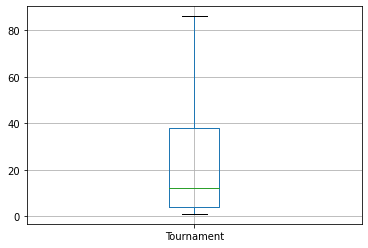

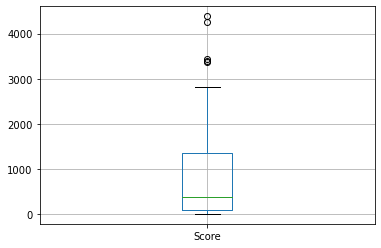

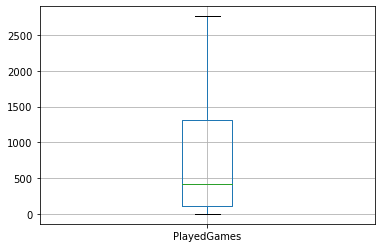

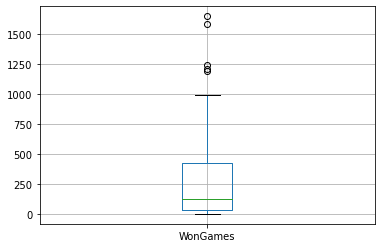

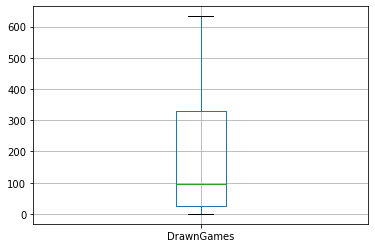

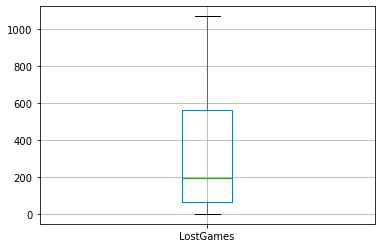

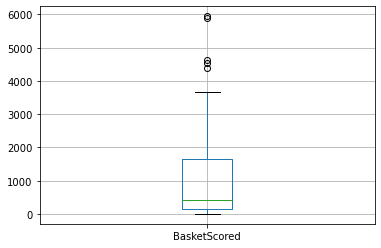

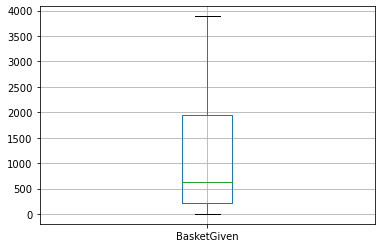

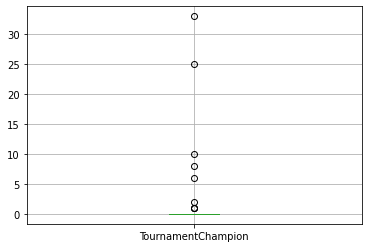

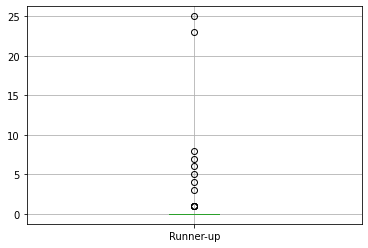

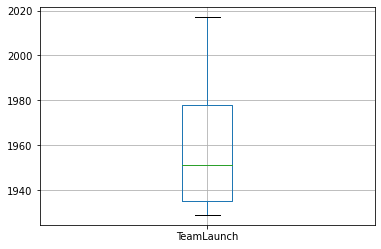

In [85]:
#box plot for each column to see the distribution and check if there are any outliers.
list_col=['Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch']
for col in list_col:
    df_cl.boxplot(column=[col])
    plt.show()

In [86]:
df_cl.head(2)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1


In [87]:
#creating new column as metric of success for each team according to played games.
df_cl["won_play"]=df_cl["WonGames"]/df_cl["PlayedGames"]

In [88]:
df_cl.head(2)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,won_play
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,0.596307
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,0.572411


In [89]:
df_final=df_cl.nlargest(10,['won_play','TournamentChampion'])
df_final.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,won_play
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,0.596307
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,0.572411
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,0.474751
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1,0.445571
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,0.437726


In [90]:
df_cl["won_play"].unique()

array([0.59630702, 0.5724113 , 0.47475134, 0.44557057, 0.43772629,
       0.41112957, 0.36100533, 0.3753258 , 0.35146022, 0.35069444,
       0.36797386, 0.3451119 , 0.31582538, 0.31722689, 0.32304527,
       0.323217  , 0.31075697, 0.34228188, 0.33704453, 0.33485401,
       0.41176471, 0.29380054, 0.2898773 , 0.29941003, 0.32236842,
       0.29299363, 0.31376518, 0.24744027, 0.32894737, 0.28109453,
       0.29078014, 0.3028169 , 0.23214286, 0.27745665, 0.30838323,
       0.28148148, 0.27192982, 0.325     , 0.2688172 , 0.28921569,
       0.29444444, 0.24342105, 0.30701754, 0.33076923, 0.22807018,
       0.29310345, 0.25      , 0.2375    , 0.27777778, 0.32222222,
       0.29166667, 0.33333333, 0.19117647, 0.21052632, 0.23333333,
       0.16666667,        nan])

In [91]:
df_cl["TournamentChampion"].unique()

array([33, 25, 10,  6,  8,  1,  0,  2], dtype=int64)

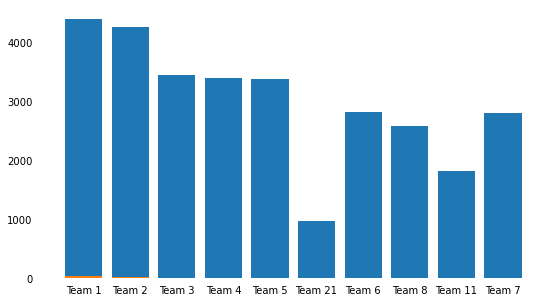

In [92]:

team=df_final["Team"]
score=df_final["Score"]
fig, ax = plt.subplots(figsize =(9,5))
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
# Horizontal Bar Plot
ax.bar(team, score)

 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 3)
ax.yaxis.set_tick_params(pad = 6)
 

plt.bar(df_final["Team"], df_final["TournamentChampion"])
plt.show()



##### from the bar chart as we see team 1 is the top team which have bigger score then team3 etc.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


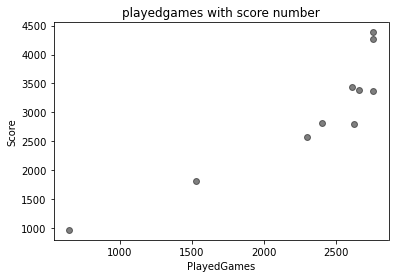

In [93]:
colors = (0,0,0)
plt.scatter(df_final["PlayedGames"],df_final["Score"], c=colors, alpha=0.5)
plt.title('playedgames with score number')
plt.xlabel('PlayedGames')
plt.ylabel('Score')
plt.show()

##### the more the team played ,the more score he get.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


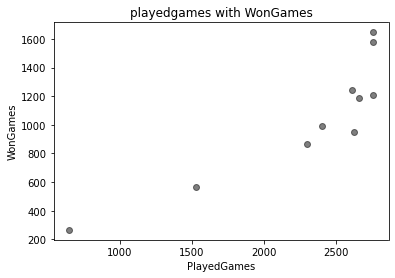

In [94]:
colors = (0,0,0)
plt.scatter(df_final["PlayedGames"],df_final["WonGames"], c=colors, alpha=0.5)
plt.title('playedgames with WonGames')
plt.xlabel('PlayedGames')
plt.ylabel('WonGames')
plt.show()

#####  there a positive relation between number of playedgames ans the wongames.

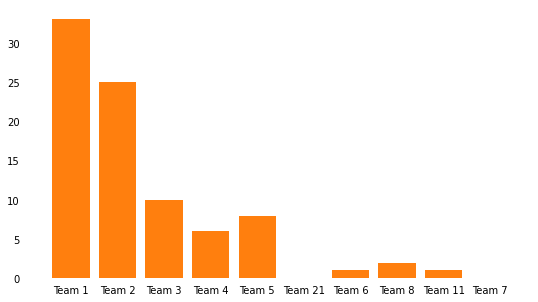

In [95]:
team=df_final["Team"]
score=df_final["TournamentChampion"]
fig, ax = plt.subplots(figsize =(9,5))
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
# Horizontal Bar Plot
ax.bar(team, score)

 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 3)
ax.yaxis.set_tick_params(pad = 6)
 

plt.bar(df_final["Team"], df_final["TournamentChampion"])
plt.show()

##### team one is a top team , it gets 33 tournamentchampion which is amazinf and the team2 and tean3.

Text(0.5, 1.0, 'score vs wining')

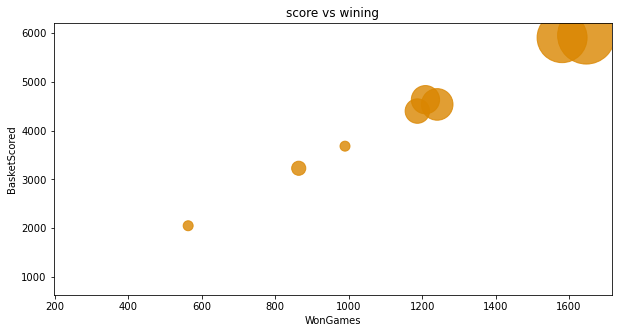

In [96]:
figure, ax = plt.subplots(figsize=(10,5))  #Creates empty plot
sns.regplot(data = df_final,x = 'WonGames',y = "BasketScored", fit_reg = False, color = '#da8600', scatter_kws={'s':df_final['TournamentChampion']*100}) #Creates Bubble Chart
ax.set_xlabel("WonGames")
ax.set_ylabel("BasketScored")
ax.set_title("score vs wining")
#BasketScored	BasketGiven	TournamentChampion

Text(0.5, 1.0, 'tournament & won_play')

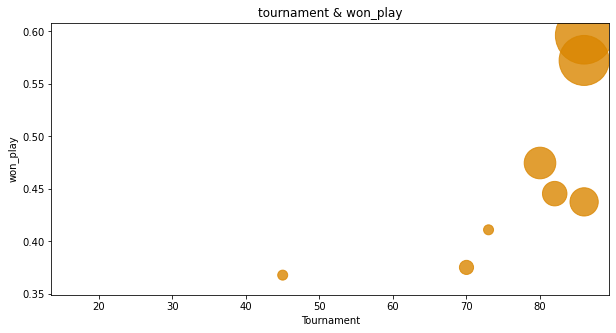

In [97]:
figure, ax = plt.subplots(figsize=(10,5))  #Creates empty plot
sns.regplot(data = df_final,x = 'Tournament',y = "won_play", fit_reg = False, color = '#da8600', scatter_kws={'s':df_final['TournamentChampion']*100}) #Creates Bubble Chart
ax.set_xlabel("Tournament")
ax.set_ylabel("won_play")
ax.set_title("tournament & won_play")

In [98]:
#pie chart for team1 (rating all different part)
df_final.head(1)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,won_play
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,0.596307


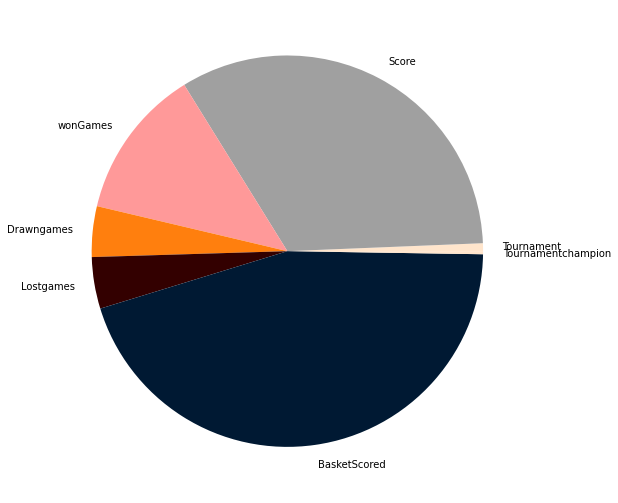

In [99]:
# Creating dataset
criteria= ['Tournament', 'Score', 'wonGames',
        'Drawngames', 'Lostgames', 'BasketScored',"Tournamentchampion"]
 
data = [86, 4385,1647, 552,563, 5947,33]
colors = ['#FFE5CC', '#A0A0A0', '#FF9999', 'tab:orange', '#330000',"#001933"]

# Creating plot
fig = plt.figure(figsize =(15, 9))
plt.pie(data, labels = criteria,colors=colors)
 
# show plot
plt.show()

### From The EDA above , all the indicators refer to that Team1 is the best one then come team2 in the second position ,Team1 has the highest relative frequency number in wining games , it took 33 chamion so it is a great deal to collaporate with it.

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Part three:




## Suggestions:
- According to the data above it is perfect and satisfied for analysis ,but the point is any team have a couch so it should be data for every couch (name-nationality-age-the period of his working time ) which lead the team .
- Each team's budget column to see if that affect on the team performance by providing more suitable conditions.